In [1]:
#this program will do the photometry on the reference frame to get stars 
#for the subtraction and to get stars for later

#if you use this code, please cite Oelkers & Stassun 2018

#import the relevant libraries for basic tools
import numpy as np
import scipy
from scipy import stats
import scipy.ndimage as ndimage
import astropy
from astropy.stats import sigma_clipped_stats
import math
import time
from photutils import DAOStarFinder
from photutils import aperture_photometry
from photutils import CircularAperture
from photutils import CircularAnnulus

#for reading in fits files
from astropy.io import fits
from astropy.wcs import WCS

#import relevant libraries for a list
import glob, os
from os import listdir
from os.path import isfile, join, exists

In [2]:
###BEGIN UPDATE#####
skygroup = 1
#useful directories
cdedir = '/home/usuario/dia_kepler/mychanges/Python/' #code directory
caldir = '/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/masters/season0/' # directory to output the flux files and location of master frame
clndir = '/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/'#directory with the cleaned images
##END UPDATE####

#read in the master frame
mast, mheader = fits.getdata(caldir+str(skygroup) +'.fits', header = True)

In [3]:
print(len(mast[0]))

1100


In [4]:
###POSSIBLE TO UNCOMMENT HERE IF YOU HAVE NO STAR LIST###

#get the positions in the master, if no star list is provided 
mean, median, std = sigma_clipped_stats(mast, sigma = 3.0, iters = 5)
daofind = DAOStarFinder(fwhm = 1.5, threshold = 5.*std)
sources = daofind(mast-median)
#set up for aperture photometry on the master frame
mean, median, std = sigma_clipped_stats(mast, sigma = 3.0, iters = 5)
positions = (sources['xcentroid'], sources['ycentroid'])
x = sources['xcentroid']
y = sources['ycentroid']

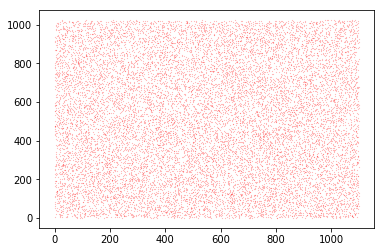

In [6]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'ro', markersize=0.1, fillstyle='none')
plt.show()

In [8]:
# import pandas as pd
# file = "/home/usuario/Documents/Mestrado/FFIs/allffi_cut/clean/masters/kic_ct_join_12142009.txt"
# kic = pd.read_csv(file,sep='|',header=[0])
# kic2 = kic.loc[:,['kic_kepler_id','kic_ra','kic_dec','kic_kepmag','kct_channel_season_0_value']]

In [9]:
# kic.columns

In [10]:
# max(kic['kct_channel_season_0_value'])

In [11]:
###END POSSIBLE UNCOMMENT###

###POSSIBLE TO UNCOMMENT HERE IF YOU HAVE A STAR LIST###
#get the positions from the star list if one is provided ###COMMENT HERE###

#ticid is the id of tess
#tmag = magnitude of TESS
# ticid, tmag, ra, dec = numpy.loadtxt('ffi_test.csv', unpack = 1, delimiter = ',', skiprows =1)

# #convert the ra/dec into positions
# os.chdir(rawdir) #changes to the raw image direcotory
# files = [f for f in glob.glob("*.fits") if isfile(join(rawdir, f))] #gets the relevant files with the proper extension
# files.sort()
# os.chdir(cdedir) #changes back to the code directory

# #get wcs from first calibrated file
# w = WCS(clndir+files[0])
# x, y = w.all_world2pix(ra, dec, 0)
# positions = (x, y)
###END POSSIBLE UNCOMMENT###

In [5]:
print('Getting the photometry on the master frame.')
#apertures to test for optimal apeture size
rads = np.arange(2,5,.25) 

#do the aperture photometry and find the optimal aperture
apertures = [CircularAperture(positions, r=r) for r in rads]
phot_table = aperture_photometry(mast, apertures, method = 'exact')
idx = 0

offset = np.zeros((len(rads),len(x)))
for ii in range(0, len(x)):
    if (x[ii] > 0) and (x[ii] < 1100) and (y[ii] > 0) and (y[ii] < 1024):
        dist = np.sqrt((x[ii]-x)**2+(y[ii]-y)**2)
        chk = np.where(dist < 6.)
        print(chk)
#         if (len(chk[0]) == 1):
#             for jj in range(1, len(rads)):
#                 mg1 = 25.-2.5*np.log10(phot_table[ii][jj+3])
#                 mg0 = 25.-2.5*np.log10(phot_table[ii][jj+2])
#                 offset[jj,ii] = mg1-mg0
# prv = 1.
# opt_rad = 10.
# for ii in range(0, len(rads)):
#     chk = np.median(offset[ii,:])        
#     if (np.abs(chk-prv) <= 0.001) and (rads[ii] < opt_rad):        
#         opt_rad = rads[ii]
#         print('The optimal aperture size is '+str(opt_rad)+'.')
#     if (np.abs(chk-prv) > 0.001):
#         prv = chk

Getting the photometry on the master frame.
(array([ 0, 36]),)
(array([1]),)
(array([2]),)
(array([ 3, 15]),)
(array([ 4, 51]),)
(array([ 5, 32]),)
(array([ 6, 55]),)
(array([ 7, 70]),)
(array([ 8, 21, 71]),)
(array([9]),)
(array([10, 95]),)
(array([11]),)
(array([12]),)
(array([13, 38]),)
(array([14]),)
(array([ 3, 15, 16, 81]),)
(array([15, 16]),)
(array([17]),)
(array([18]),)
(array([19]),)
(array([20, 86]),)
(array([ 8, 21, 71]),)
(array([22]),)
(array([23]),)
(array([24]),)
(array([25, 76]),)
(array([26, 97]),)
(array([27, 47]),)
(array([28]),)
(array([29, 49]),)
(array([30]),)
(array([31]),)
(array([ 5, 32]),)
(array([33]),)
(array([34]),)
(array([35, 42, 87]),)
(array([ 0, 36]),)
(array([37]),)
(array([13, 38]),)
(array([39]),)
(array([40, 53]),)
(array([ 41, 108]),)
(array([35, 42]),)
(array([43, 65]),)
(array([44, 45]),)
(array([44, 45]),)
(array([46]),)
(array([27, 47]),)
(array([48]),)
(array([29, 49, 79]),)
(array([50]),)
(array([ 4, 51]),)
(array([52]),)
(array([40, 53]),)

(array([378, 444]),)
(array([366, 445]),)
(array([446, 468, 502]),)
(array([447, 487]),)
(array([448]),)
(array([424, 449, 525]),)
(array([450]),)
(array([451]),)
(array([452, 491]),)
(array([395, 453, 480]),)
(array([395, 396, 454, 492]),)
(array([415, 455, 456, 473, 481]),)
(array([415, 455, 456, 481]),)
(array([443, 457, 474]),)
(array([458, 465]),)
(array([459, 513]),)
(array([460]),)
(array([437, 461, 507]),)
(array([422, 462, 520]),)
(array([463]),)
(array([443, 464]),)
(array([458, 465]),)
(array([381, 466, 483]),)
(array([467, 501]),)
(array([446, 468, 502, 503]),)
(array([469, 536]),)
(array([470]),)
(array([409, 471]),)
(array([392, 472, 524]),)
(array([455, 473]),)
(array([457, 474, 496]),)
(array([475]),)
(array([476]),)
(array([477]),)
(array([478]),)
(array([479, 506]),)
(array([453, 480, 559]),)
(array([455, 456, 481, 561]),)
(array([441, 482, 495, 528]),)
(array([466, 483, 534]),)
(array([484]),)
(array([485]),)
(array([486]),)
(array([447, 487]),)
(array([488]),)
(arra

(array([929]),)
(array([930, 989]),)
(array([ 931, 1003]),)
(array([884, 932]),)
(array([933]),)
(array([861, 906, 934, 993]),)
(array([ 935,  936, 1008]),)
(array([935, 936]),)
(array([937]),)
(array([938]),)
(array([876, 892, 939]),)
(array([ 940, 1014]),)
(array([899, 941, 954, 955]),)
(array([904, 942]),)
(array([943]),)
(array([944]),)
(array([869, 945]),)
(array([907, 946]),)
(array([909, 947]),)
(array([948]),)
(array([892, 912, 949]),)
(array([950, 979]),)
(array([951, 979]),)
(array([952]),)
(array([897, 953, 980]),)
(array([941, 954, 955]),)
(array([ 941,  954,  955, 1019]),)
(array([920, 956]),)
(array([957]),)
(array([958, 987]),)
(array([ 905,  959, 1004]),)
(array([960, 971]),)
(array([961]),)
(array([ 962, 1035]),)
(array([963]),)
(array([ 964, 1012]),)
(array([965, 997]),)
(array([966]),)
(array([967]),)
(array([968]),)
(array([969, 970]),)
(array([ 969,  970,  986, 1062]),)
(array([960, 971]),)
(array([972]),)
(array([ 885,  973, 1005]),)
(array([974]),)
(array([975]),

(array([1448, 1534]),)
(array([1385, 1449]),)
(array([1418, 1450, 1504, 1539]),)
(array([1451, 1488]),)
(array([1391, 1452]),)
(array([1453, 1489, 1506]),)
(array([1421, 1454, 1473]),)
(array([1423, 1455]),)
(array([1441, 1456]),)
(array([1457, 1495, 1516, 1530]),)
(array([1458, 1459]),)
(array([1381, 1458, 1459]),)
(array([1460]),)
(array([1461, 1519, 1531]),)
(array([1414, 1462, 1520]),)
(array([1463, 1499]),)
(array([1464]),)
(array([1465]),)
(array([1416, 1466]),)
(array([1401, 1467, 1523]),)
(array([1403, 1468, 1526]),)
(array([1469]),)
(array([1470, 1488, 1540]),)
(array([1471, 1527]),)
(array([1420, 1472, 1473]),)
(array([1454, 1472, 1473]),)
(array([1474]),)
(array([1475]),)
(array([1476, 1565]),)
(array([1409, 1477]),)
(array([1478, 1497]),)
(array([1479]),)
(array([1430, 1480, 1481, 1551]),)
(array([1480, 1481]),)
(array([1482]),)
(array([1483, 1552]),)
(array([1425, 1484, 1532]),)
(array([1400, 1485]),)
(array([1486]),)
(array([1487]),)
(array([1451, 1470, 1488, 1575]),)
(ar

(array([1871, 1921, 1938]),)
(array([1939]),)
(array([1940]),)
(array([1872, 1941]),)
(array([1893, 1894, 1942, 2028]),)
(array([1895, 1943, 1988]),)
(array([1926, 1944, 2001]),)
(array([1945, 1980]),)
(array([1946]),)
(array([1899, 1947, 1983]),)
(array([1948, 1984, 2002]),)
(array([1949]),)
(array([1950, 2021]),)
(array([1951]),)
(array([1868, 1952, 2022]),)
(array([1909, 1953, 1993]),)
(array([1954]),)
(array([1955, 1994, 2011]),)
(array([1956, 1997]),)
(array([1957]),)
(array([1891, 1958]),)
(array([1959]),)
(array([1960]),)
(array([1961, 2029]),)
(array([1962]),)
(array([1963]),)
(array([1877, 1964, 2030]),)
(array([1879, 1901, 1965]),)
(array([1902, 1966]),)
(array([1904, 1935, 1967]),)
(array([1968, 2032]),)
(array([1969]),)
(array([1970, 2007]),)
(array([1971, 1972]),)
(array([1971, 1972, 2009]),)
(array([1973]),)
(array([1974, 2012]),)
(array([1975]),)
(array([1892, 1976]),)
(array([1977]),)
(array([1978]),)
(array([1979]),)
(array([1926, 1945, 1980, 2001]),)
(array([1981, 203

(array([2411, 2442, 2525]),)
(array([2426, 2443, 2444, 2485]),)
(array([2388, 2443, 2444, 2485]),)
(array([2376, 2403, 2445]),)
(array([2413, 2446]),)
(array([2377, 2429, 2447, 2489]),)
(array([2404, 2448]),)
(array([2406, 2449, 2450, 2457]),)
(array([2406, 2449, 2450]),)
(array([2451]),)
(array([2407, 2452]),)
(array([2453, 2476]),)
(array([2408, 2454]),)
(array([2410, 2455, 2481]),)
(array([2456]),)
(array([2449, 2457]),)
(array([2395, 2458, 2473]),)
(array([2459]),)
(array([2460]),)
(array([2461]),)
(array([2462, 2503]),)
(array([2440, 2463]),)
(array([2464]),)
(array([2465, 2543, 2544]),)
(array([2425, 2466, 2506]),)
(array([2467]),)
(array([2468, 2529]),)
(array([2415, 2469, 2519]),)
(array([2470]),)
(array([2432, 2471, 2568]),)
(array([2472]),)
(array([2395, 2458, 2473, 2522]),)
(array([2434, 2474]),)
(array([2418, 2475, 2533]),)
(array([2453, 2476, 2557]),)
(array([2477]),)
(array([2478]),)
(array([2479]),)
(array([2480]),)
(array([2386, 2424, 2455, 2481]),)
(array([2482]),)
(ar

(array([2948]),)
(array([2917, 2949]),)
(array([2921, 2950]),)
(array([2951]),)
(array([2952]),)
(array([2880, 2953]),)
(array([2954]),)
(array([2934, 2955, 2986]),)
(array([2908, 2956]),)
(array([2957]),)
(array([2958]),)
(array([2959]),)
(array([2960]),)
(array([2876, 2911, 2961, 3037]),)
(array([2913, 2962, 2994]),)
(array([2915, 2963]),)
(array([2964, 3040]),)
(array([2965]),)
(array([2966, 3014]),)
(array([2967, 3018]),)
(array([2892, 2968, 3028]),)
(array([2969, 3019]),)
(array([2906, 2935, 2970, 3003]),)
(array([2971]),)
(array([2940, 2972]),)
(array([2943, 2973, 3022, 3023]),)
(array([2974, 3064]),)
(array([2975, 3050]),)
(array([2976]),)
(array([2912, 2977]),)
(array([2914, 2978, 3038]),)
(array([2979, 3027]),)
(array([2980, 3056, 3068]),)
(array([2930, 2981, 3016]),)
(array([2982]),)
(array([2983, 2984, 3043]),)
(array([2983, 2984]),)
(array([2985]),)
(array([2955, 2986]),)
(array([2987]),)
(array([2988]),)
(array([2989]),)
(array([2941, 2990, 3009]),)
(array([2991]),)
(array

(array([3440, 3459]),)
(array([3441, 3459]),)
(array([3442]),)
(array([3443, 3509, 3521]),)
(array([3444, 3462]),)
(array([3445, 3463, 3464]),)
(array([3446, 3495]),)
(array([3447]),)
(array([3448, 3496]),)
(array([3449]),)
(array([3450]),)
(array([3451, 3466]),)
(array([3452]),)
(array([3453]),)
(array([3414, 3454, 3455]),)
(array([3414, 3454, 3455]),)
(array([3456, 3516]),)
(array([3402, 3457]),)
(array([3458]),)
(array([3440, 3441, 3459]),)
(array([3460]),)
(array([3406, 3461, 3522]),)
(array([3394, 3444, 3462]),)
(array([3445, 3463, 3464]),)
(array([3445, 3463, 3464]),)
(array([3465, 3495]),)
(array([3451, 3466]),)
(array([3410, 3467]),)
(array([3385, 3468, 3469]),)
(array([3385, 3468, 3469, 3486]),)
(array([3400, 3470]),)
(array([3471, 3516]),)
(array([3472, 3473, 3534, 3535]),)
(array([3426, 3472, 3473, 3535]),)
(array([3428, 3474]),)
(array([3438, 3475]),)
(array([3476]),)
(array([3477]),)
(array([3478, 3479]),)
(array([3478, 3479]),)
(array([3480, 3552]),)
(array([3481]),)
(arr

(array([3944]),)
(array([3945]),)
(array([3913, 3946, 4001]),)
(array([3915, 3947]),)
(array([3883, 3948, 3989]),)
(array([3949]),)
(array([3885, 3950]),)
(array([3901, 3931, 3951]),)
(array([3952, 3991, 4007]),)
(array([3888, 3953]),)
(array([3856, 3954, 4009, 4019]),)
(array([3908, 3955]),)
(array([3893, 3937, 3956, 3982]),)
(array([3928, 3957]),)
(array([3958]),)
(array([3897, 3916, 3959, 4033]),)
(array([3930, 3960]),)
(array([3884, 3961, 4003, 4004]),)
(array([3962, 4035]),)
(array([3963, 4006]),)
(array([3964]),)
(array([3902, 3932, 3965]),)
(array([3966]),)
(array([3967, 4017, 4041]),)
(array([3905, 3968]),)
(array([3890, 3969]),)
(array([3970, 3971, 4071]),)
(array([3970, 3971]),)
(array([3972]),)
(array([3973, 4039]),)
(array([3918, 3974]),)
(array([3975]),)
(array([3976]),)
(array([3977]),)
(array([3906, 3978, 3979, 4052]),)
(array([3978, 3979, 4052]),)
(array([3980]),)
(array([3921, 3937, 3981, 3982]),)
(array([3893, 3921, 3937, 3956, 3981, 3982, 4055, 4072]),)
(array([3983,

(array([4449]),)
(array([4394, 4450]),)
(array([4451]),)
(array([4452, 4462]),)
(array([4453]),)
(array([4454, 4463]),)
(array([4412, 4455]),)
(array([4426, 4456]),)
(array([4367, 4457]),)
(array([4458, 4512]),)
(array([4459, 4514, 4515]),)
(array([4460]),)
(array([4461, 4521]),)
(array([4452, 4462, 4546]),)
(array([4454, 4463]),)
(array([4397, 4464]),)
(array([4410, 4465, 4479]),)
(array([4466]),)
(array([4467, 4495, 4508]),)
(array([4468]),)
(array([4469, 4510, 4511]),)
(array([4470, 4471]),)
(array([4470, 4471]),)
(array([4472]),)
(array([4473]),)
(array([4474]),)
(array([4475, 4543]),)
(array([4476]),)
(array([4477]),)
(array([4425, 4478]),)
(array([4465, 4479, 4548]),)
(array([4480, 4559]),)
(array([4481]),)
(array([4444, 4482, 4483]),)
(array([4426, 4482, 4483]),)
(array([4445, 4484, 4561]),)
(array([4430, 4485, 4536]),)
(array([4486]),)
(array([4447, 4487]),)
(array([4488, 4564, 4565]),)
(array([4489]),)
(array([4490, 4540]),)
(array([4491, 4499, 4566]),)
(array([4492, 4493, 458

(array([4952, 4991]),)
(array([4923, 4938, 4953]),)
(array([4901, 4925, 4954, 4996]),)
(array([4886, 4955, 4982]),)
(array([4956]),)
(array([4904, 4905, 4957, 4971]),)
(array([4890, 4909, 4958, 4959]),)
(array([4890, 4909, 4958, 4959]),)
(array([4960]),)
(array([4911, 4961]),)
(array([4962, 4988, 5032]),)
(array([4963]),)
(array([4921, 4964, 5059]),)
(array([4965]),)
(array([4966, 5028]),)
(array([4967]),)
(array([4916, 4968, 5002]),)
(array([4969]),)
(array([4944, 4970]),)
(array([4905, 4957, 4971]),)
(array([4972, 5041]),)
(array([4973, 5021]),)
(array([4974, 4988, 5022]),)
(array([4920, 4950, 4975, 5023]),)
(array([4976]),)
(array([4977, 4978, 5013]),)
(array([4977, 4978]),)
(array([4979, 5035]),)
(array([4900, 4980]),)
(array([4981, 5048]),)
(array([4955, 4982]),)
(array([4983]),)
(array([4984]),)
(array([4985, 5003]),)
(array([4986]),)
(array([4946, 4987]),)
(array([4962, 4974, 4988, 5032]),)
(array([4989, 5024]),)
(array([4990]),)
(array([4952, 4991]),)
(array([4992]),)
(array([4

(array([5461]),)
(array([5462, 5505]),)
(array([5463]),)
(array([5402, 5464, 5520]),)
(array([5465, 5508]),)
(array([5466, 5497]),)
(array([5423, 5467, 5523]),)
(array([5468, 5530]),)
(array([5469]),)
(array([5470]),)
(array([5435, 5444, 5471]),)
(array([5472]),)
(array([5427, 5473, 5512]),)
(array([5474, 5548]),)
(array([5414, 5475, 5536]),)
(array([5460, 5476, 5504]),)
(array([5477]),)
(array([5478, 5519]),)
(array([5479, 5498]),)
(array([5424, 5480, 5532]),)
(array([5481]),)
(array([5482]),)
(array([5483, 5533]),)
(array([5484, 5516]),)
(array([5485]),)
(array([5486]),)
(array([5433, 5448, 5449, 5487]),)
(array([5488, 5489]),)
(array([5488, 5489]),)
(array([5490, 5491]),)
(array([5419, 5490, 5491]),)
(array([5492]),)
(array([5493, 5494]),)
(array([5493, 5494]),)
(array([5495, 5507, 5541]),)
(array([5434, 5496, 5520]),)
(array([5466, 5497, 5553]),)
(array([5479, 5498, 5499]),)
(array([5498, 5499, 5554]),)
(array([5500]),)
(array([5457, 5501]),)
(array([5502]),)
(array([5503]),)
(arra

(array([5973, 6063]),)
(array([5910, 5974]),)
(array([5929, 5975]),)
(array([5912, 5976]),)
(array([5977]),)
(array([5914, 5978]),)
(array([5979, 6035]),)
(array([5980]),)
(array([5981]),)
(array([5982]),)
(array([5983]),)
(array([5984, 6005]),)
(array([5985]),)
(array([5926, 5986]),)
(array([5987, 6050]),)
(array([5972, 5988, 6030]),)
(array([5948, 5989, 5990]),)
(array([5949, 5989, 5990]),)
(array([5949, 5962, 5991]),)
(array([5992]),)
(array([5993]),)
(array([5911, 5994]),)
(array([5904, 5995, 5996]),)
(array([5995, 5996, 6034]),)
(array([5997]),)
(array([5998]),)
(array([5933, 5999, 6043, 6069]),)
(array([6000]),)
(array([6001, 6044]),)
(array([5918, 5919, 6002]),)
(array([6003]),)
(array([6004]),)
(array([5984, 6005, 6047]),)
(array([6006]),)
(array([5940, 6007, 6079]),)
(array([6008, 6049]),)
(array([5946, 6009]),)
(array([6010]),)
(array([6011, 6080]),)
(array([6012]),)
(array([5950, 6013, 6086]),)
(array([6014]),)
(array([5952, 6015]),)
(array([5964, 6016, 6042]),)
(array([5955

(array([6490]),)
(array([6421, 6460, 6491, 6506]),)
(array([6492]),)
(array([6429, 6479, 6493]),)
(array([6494, 6495, 6513]),)
(array([6494, 6495]),)
(array([6496, 6514]),)
(array([6483, 6497, 6527]),)
(array([6498]),)
(array([6499]),)
(array([6440, 6500, 6501]),)
(array([6472, 6500, 6501]),)
(array([6502]),)
(array([6450, 6503]),)
(array([6474, 6504]),)
(array([6505]),)
(array([6491, 6506, 6555]),)
(array([6461, 6507]),)
(array([6508]),)
(array([6509, 6571]),)
(array([6462, 6510]),)
(array([6511]),)
(array([6512, 6545]),)
(array([6480, 6494, 6513]),)
(array([6481, 6496, 6514]),)
(array([6515]),)
(array([6516]),)
(array([6517]),)
(array([6487, 6518, 6539]),)
(array([6441, 6519, 6542]),)
(array([6520]),)
(array([6521]),)
(array([6522]),)
(array([6464, 6523, 6585]),)
(array([6524]),)
(array([6525]),)
(array([6483, 6526, 6527]),)
(array([6483, 6497, 6526, 6527]),)
(array([6485, 6528]),)
(array([6529, 6591]),)
(array([6530]),)
(array([6531, 6551, 6563]),)
(array([6532, 6533, 6603, 6604]),)

(array([6979]),)
(array([6980, 7037]),)
(array([6930, 6981]),)
(array([6969, 6982, 7058]),)
(array([6951, 6983, 7002]),)
(array([6922, 6984]),)
(array([6985]),)
(array([6986, 7061]),)
(array([6956, 6987]),)
(array([6988]),)
(array([6938, 6989, 7063]),)
(array([6990]),)
(array([6991, 7017]),)
(array([6975, 6992]),)
(array([6975, 6993, 7019, 7067]),)
(array([6994, 7052]),)
(array([6928, 6995]),)
(array([6996]),)
(array([6997]),)
(array([6940, 6998]),)
(array([6898, 6999, 7041]),)
(array([7000]),)
(array([7001]),)
(array([6983, 7002]),)
(array([6954, 7003]),)
(array([7004]),)
(array([7005, 7050]),)
(array([7006]),)
(array([7007]),)
(array([6947, 6976, 7008]),)
(array([7009]),)
(array([7010]),)
(array([6948, 7011]),)
(array([7012]),)
(array([6950, 7013, 7074]),)
(array([6958, 7014, 7047]),)
(array([6973, 7015, 7089]),)
(array([7016]),)
(array([6991, 7017]),)
(array([6974, 7018, 7051]),)
(array([6975, 6993, 7019, 7067]),)
(array([6963, 7020, 7035]),)
(array([6978, 7021]),)
(array([7022]),)


(array([7498]),)
(array([7499]),)
(array([7500]),)
(array([7478, 7501]),)
(array([7502, 7536]),)
(array([7483, 7503]),)
(array([7504, 7549]),)
(array([7505]),)
(array([7506]),)
(array([7463, 7507]),)
(array([7463, 7508]),)
(array([7509, 7524]),)
(array([7510]),)
(array([7511]),)
(array([7512]),)
(array([7513, 7557]),)
(array([7514]),)
(array([7497, 7515, 7543]),)
(array([7516, 7570]),)
(array([7517]),)
(array([7518]),)
(array([7460, 7519]),)
(array([7520]),)
(array([7521, 7566]),)
(array([7522]),)
(array([7523]),)
(array([7509, 7524]),)
(array([7525]),)
(array([7526]),)
(array([7452, 7527]),)
(array([7473, 7474, 7528]),)
(array([7475, 7529, 7557]),)
(array([7466, 7530]),)
(array([7531]),)
(array([7532, 7558, 7584]),)
(array([7533]),)
(array([7534]),)
(array([7535, 7588]),)
(array([7502, 7536]),)
(array([7537, 7573]),)
(array([7538]),)
(array([7539, 7564]),)
(array([7540, 7578]),)
(array([7541]),)
(array([7542]),)
(array([7515, 7543, 7603]),)
(array([7544]),)
(array([7545]),)
(array([75

(array([8021, 8048]),)
(array([8022, 8037]),)
(array([7983, 8023]),)
(array([8024]),)
(array([8025, 8059]),)
(array([8026]),)
(array([8027]),)
(array([8000, 8028]),)
(array([7975, 8029, 8066]),)
(array([7963, 8030]),)
(array([7964, 7985, 8031, 8071]),)
(array([8032, 8033]),)
(array([8032, 8033]),)
(array([8034]),)
(array([7980, 8035]),)
(array([8020, 8036, 8073]),)
(array([8022, 8037]),)
(array([7991, 8009, 8038]),)
(array([8039, 8078]),)
(array([8015, 8040, 8063, 8080]),)
(array([8041]),)
(array([8042, 8100]),)
(array([8043]),)
(array([8044, 8102]),)
(array([7986, 8045, 8055]),)
(array([7979, 8046, 8085]),)
(array([7981, 8047]),)
(array([8021, 8048]),)
(array([8049, 8050]),)
(array([7984, 8049, 8050]),)
(array([7970, 8051]),)
(array([8052]),)
(array([8053]),)
(array([8054]),)
(array([7986, 8045, 8055, 8084]),)
(array([7987, 8056, 8110]),)
(array([8057, 8088]),)
(array([8058]),)
(array([8025, 8059, 8146]),)
(array([8060, 8090]),)
(array([8061, 8091]),)
(array([8062]),)
(array([8015, 80

(array([8538]),)
(array([8539]),)
(array([8540]),)
(array([8541]),)
(array([8542, 8611]),)
(array([8543]),)
(array([8470, 8513, 8544]),)
(array([8486, 8545, 8558]),)
(array([8498, 8534, 8546]),)
(array([8547]),)
(array([8499, 8548, 8560]),)
(array([8549]),)
(array([8537, 8550, 8561]),)
(array([8551]),)
(array([8552, 8606]),)
(array([8553]),)
(array([8493, 8554, 8568, 8593, 8610]),)
(array([8555, 8581]),)
(array([8523, 8556]),)
(array([8557, 8614]),)
(array([8545, 8558, 8630]),)
(array([8559]),)
(array([8548, 8560]),)
(array([8550, 8561]),)
(array([8562]),)
(array([8563]),)
(array([8564]),)
(array([8565, 8579, 8622]),)
(array([8517, 8566]),)
(array([8567, 8608]),)
(array([8503, 8554, 8568, 8610]),)
(array([8569]),)
(array([8570]),)
(array([8571, 8625]),)
(array([8572]),)
(array([8573]),)
(array([8574]),)
(array([8575]),)
(array([8576]),)
(array([8577]),)
(array([8515, 8578]),)
(array([8565, 8579, 8622]),)
(array([8580, 8609]),)
(array([8555, 8581]),)
(array([8520, 8582, 8639]),)
(array(

(array([9002, 9036, 9067]),)
(array([9037, 9073, 9115]),)
(array([9038]),)
(array([9039, 9076]),)
(array([8979, 9040]),)
(array([8979, 9041]),)
(array([9017, 9042, 9052]),)
(array([9018, 9043, 9106]),)
(array([9020, 9044]),)
(array([9045]),)
(array([9046]),)
(array([9047]),)
(array([8993, 9048]),)
(array([9049]),)
(array([9050, 9117]),)
(array([9051, 9119]),)
(array([9017, 9042, 9052]),)
(array([9053]),)
(array([9054]),)
(array([9055]),)
(array([9056]),)
(array([9057]),)
(array([9058, 9084]),)
(array([9009, 9059]),)
(array([9060]),)
(array([8987, 9061]),)
(array([9062]),)
(array([9063]),)
(array([9064]),)
(array([9065]),)
(array([9066]),)
(array([9036, 9067]),)
(array([9068]),)
(array([9069, 9099]),)
(array([9070, 9113]),)
(array([9071]),)
(array([9072]),)
(array([9037, 9073, 9116, 9135]),)
(array([9074]),)
(array([9007, 9075]),)
(array([9039, 9076]),)
(array([9077]),)
(array([9078, 9095]),)
(array([9079]),)
(array([9080, 9096]),)
(array([9081, 9144]),)
(array([9082]),)
(array([9083, 9

(array([9482, 9517, 9563]),)
(array([9483]),)
(array([9420, 9484]),)
(array([9485]),)
(array([9425, 9486, 9549]),)
(array([9487]),)
(array([9451, 9488]),)
(array([9437, 9489, 9542]),)
(array([9490]),)
(array([9491, 9560]),)
(array([9492]),)
(array([9440, 9493, 9504, 9534]),)
(array([9494, 9574]),)
(array([9433, 9495]),)
(array([9496]),)
(array([9497, 9523]),)
(array([9426, 9449, 9498, 9509]),)
(array([9499, 9510]),)
(array([9427, 9477, 9500]),)
(array([9501, 9561]),)
(array([9502]),)
(array([9439, 9503]),)
(array([9462, 9493, 9504]),)
(array([9467, 9468, 9505]),)
(array([9506, 9507]),)
(array([9470, 9506, 9507]),)
(array([9508]),)
(array([9434, 9498, 9509, 9580]),)
(array([9499, 9510]),)
(array([9451, 9452, 9511]),)
(array([9512, 9573]),)
(array([9513]),)
(array([9460, 9514]),)
(array([9515]),)
(array([9441, 9516]),)
(array([9481, 9482, 9517, 9562, 9588]),)
(array([9518]),)
(array([9519]),)
(array([9520]),)
(array([9521, 9548]),)
(array([9522]),)
(array([9473, 9497, 9523]),)
(array([95

(array([9979]),)
(array([9980]),)
(array([9981]),)
(array([ 9982, 10062]),)
(array([ 9915,  9983, 10027]),)
(array([9984]),)
(array([ 9985, 10029, 10053]),)
(array([9986]),)
(array([9987]),)
(array([9988]),)
(array([9989]),)
(array([9990]),)
(array([9944, 9991]),)
(array([ 9992, 10019]),)
(array([9993]),)
(array([9994]),)
(array([ 9922,  9995, 10022]),)
(array([9938, 9967, 9977, 9996]),)
(array([9997]),)
(array([9998]),)
(array([ 9940,  9999, 10045, 10064]),)
(array([10000]),)
(array([ 9953, 10001, 10025]),)
(array([10002]),)
(array([10003]),)
(array([ 9956, 10004]),)
(array([10005, 10068]),)
(array([10006]),)
(array([ 9947, 10007, 10024, 10041, 10059]),)
(array([10008, 10042]),)
(array([ 9948, 10009, 10044]),)
(array([ 9925,  9950,  9951, 10010]),)
(array([ 9952, 10011]),)
(array([10012, 10025]),)
(array([10013]),)
(array([10014]),)
(array([ 9971, 10015]),)
(array([ 9942, 10016, 10030, 10047]),)
(array([10017]),)
(array([10018]),)
(array([ 9992, 10019, 10083]),)
(array([10020]),)
(arr

(array([10435, 10482, 10500, 10516, 10565]),)
(array([10414, 10483]),)
(array([10484]),)
(array([10485, 10553]),)
(array([10438, 10486, 10545]),)
(array([10455, 10487, 10488]),)
(array([10455, 10487, 10488]),)
(array([10402, 10489, 10490]),)
(array([10489, 10490]),)
(array([10491]),)
(array([10492, 10558]),)
(array([10493]),)
(array([10494]),)
(array([10410, 10463, 10495]),)
(array([10446, 10496, 10573]),)
(array([10429, 10481, 10497, 10514]),)
(array([10498, 10539]),)
(array([10499]),)
(array([10435, 10482, 10500, 10516, 10565]),)
(array([10414, 10501, 10574]),)
(array([10457, 10502, 10517]),)
(array([10503, 10519, 10569]),)
(array([10419, 10504]),)
(array([10440, 10505]),)
(array([10420, 10506, 10559]),)
(array([10441, 10507]),)
(array([10441, 10508]),)
(array([10423, 10509]),)
(array([10510]),)
(array([10478, 10511]),)
(array([10512]),)
(array([10513]),)
(array([10429, 10481, 10497, 10514]),)
(array([10464, 10515]),)
(array([10482, 10500, 10516, 10565]),)
(array([10457, 10502, 10517

(array([10950]),)
(array([10951, 10979, 11024]),)
(array([10952, 11025]),)
(array([10953]),)
(array([10954]),)
(array([10955, 11006, 11027]),)
(array([10956]),)
(array([10957]),)
(array([10892, 10958]),)
(array([10959, 11000]),)
(array([10960, 11003]),)
(array([10961, 11019]),)
(array([10899, 10962]),)
(array([10947, 10963]),)
(array([10964, 10986]),)
(array([10931, 10965]),)
(array([10966, 10989]),)
(array([10967, 11039]),)
(array([10968]),)
(array([10937, 10969]),)
(array([10940, 10970]),)
(array([10971, 10997]),)
(array([10909, 10910, 10972, 11028]),)
(array([10973, 10983]),)
(array([10974]),)
(array([10975, 11038]),)
(array([10903, 10976]),)
(array([10977]),)
(array([10904, 10978]),)
(array([10951, 10979, 11024, 11054]),)
(array([10980]),)
(array([10981, 10996]),)
(array([10982]),)
(array([10923, 10973, 10983, 11046]),)
(array([10984]),)
(array([10985, 11017]),)
(array([10964, 10986]),)
(array([10949, 10987, 11021]),)
(array([10988]),)
(array([10966, 10989]),)
(array([10990, 11026]

(array([11385, 11417, 11434, 11435, 11486]),)
(array([11434, 11435]),)
(array([11436]),)
(array([11419, 11437, 11499]),)
(array([11438, 11472, 11510]),)
(array([11386, 11421, 11439]),)
(array([11400, 11440]),)
(array([11441]),)
(array([11442, 11457, 11476]),)
(array([11443, 11477]),)
(array([11402, 11444]),)
(array([11445]),)
(array([11446, 11447, 11462]),)
(array([11446, 11447, 11463]),)
(array([11448, 11480]),)
(array([11390, 11449]),)
(array([11393, 11450, 11451]),)
(array([11393, 11450, 11451]),)
(array([11384, 11452]),)
(array([11453]),)
(array([11454, 11531]),)
(array([11455]),)
(array([11456]),)
(array([11442, 11457, 11501]),)
(array([11407, 11458]),)
(array([11459, 11535]),)
(array([11379, 11460]),)
(array([11461, 11506]),)
(array([11446, 11462]),)
(array([11447, 11463, 11479]),)
(array([11464, 11507]),)
(array([11465]),)
(array([11466]),)
(array([11467]),)
(array([11414, 11468]),)
(array([11415, 11469]),)
(array([11470]),)
(array([11471]),)
(array([11420, 11438, 11472]),)
(arr

(array([11860, 11914]),)
(array([11915]),)
(array([11874, 11916]),)
(array([11917, 11956, 11976]),)
(array([11889, 11918]),)
(array([11919, 11959]),)
(array([11920, 11968]),)
(array([11921]),)
(array([11907, 11922]),)
(array([11923]),)
(array([11884, 11924]),)
(array([11925]),)
(array([11926, 11984, 12012]),)
(array([11897, 11927]),)
(array([11928]),)
(array([11929]),)
(array([11930, 12006]),)
(array([11911, 11931]),)
(array([11881, 11911, 11932, 11966]),)
(array([11912, 11933, 11966, 11967]),)
(array([11934]),)
(array([11935, 11951]),)
(array([11936]),)
(array([11898, 11937]),)
(array([11938]),)
(array([11887, 11939]),)
(array([11900, 11940, 12018]),)
(array([11941, 11987]),)
(array([11942]),)
(array([11876, 11943]),)
(array([11944]),)
(array([11894, 11945]),)
(array([11946]),)
(array([11895, 11947, 12011]),)
(array([11948, 11949]),)
(array([11948, 11949]),)
(array([11950]),)
(array([11935, 11951]),)
(array([11952, 11975]),)
(array([11953]),)
(array([11954]),)
(array([11955]),)
(array

(array([12356, 12414]),)
(array([12415]),)
(array([12416, 12424]),)
(array([12359, 12402, 12417]),)
(array([12418, 12438]),)
(array([12382, 12419]),)
(array([12420]),)
(array([12421]),)
(array([12422]),)
(array([12423, 12431]),)
(array([12416, 12424]),)
(array([12391, 12425]),)
(array([12426]),)
(array([12427]),)
(array([12399, 12428, 12463]),)
(array([12400, 12429, 12466]),)
(array([12430]),)
(array([12412, 12423, 12431]),)
(array([12432, 12448]),)
(array([12368, 12433, 12508]),)
(array([12434, 12473]),)
(array([12435]),)
(array([12436]),)
(array([12437, 12488]),)
(array([12418, 12438]),)
(array([12439]),)
(array([12440]),)
(array([12441, 12442]),)
(array([12441, 12442]),)
(array([12397, 12443]),)
(array([12444]),)
(array([12445, 12466]),)
(array([12446, 12447]),)
(array([12446, 12447]),)
(array([12432, 12448, 12481, 12525]),)
(array([12449]),)
(array([12450, 12471, 12482, 12517]),)
(array([12451]),)
(array([12389, 12452]),)
(array([12453]),)
(array([12454, 12455, 12496]),)
(array([12

(array([12921, 12935, 12970]),)
(array([12909, 12922, 12988]),)
(array([12923]),)
(array([12885, 12924, 12925]),)
(array([12877, 12885, 12924, 12925]),)
(array([12913, 12926]),)
(array([12927]),)
(array([12919, 12928, 12947, 12995, 13023]),)
(array([12929, 12979]),)
(array([12930]),)
(array([12931, 13026]),)
(array([12932, 12983]),)
(array([12933, 13014]),)
(array([12934]),)
(array([12921, 12935]),)
(array([12936, 12958]),)
(array([12937]),)
(array([12897, 12938]),)
(array([12939]),)
(array([12940, 13018]),)
(array([12941, 12973]),)
(array([12942, 13002]),)
(array([12943]),)
(array([12878, 12944]),)
(array([12890, 12945, 12946]),)
(array([12945, 12946]),)
(array([12928, 12947, 12995]),)
(array([12891, 12948, 12966, 13009]),)
(array([12874, 12949]),)
(array([12893, 12950]),)
(array([12881, 12951, 12982]),)
(array([12952]),)
(array([12953, 13016]),)
(array([12882, 12954, 12955]),)
(array([12954, 12955]),)
(array([12956]),)
(array([12957, 13001, 13017]),)
(array([12936, 12958]),)
(array([

(array([13386, 13422, 13447]),)
(array([13386, 13423, 13465]),)
(array([13357, 13424]),)
(array([13425, 13468]),)
(array([13362, 13426]),)
(array([13427]),)
(array([13428, 13429]),)
(array([13428, 13429, 13470]),)
(array([13394, 13430]),)
(array([13431]),)
(array([13379, 13432]),)
(array([13433]),)
(array([13397, 13434]),)
(array([13389, 13435]),)
(array([13436, 13448]),)
(array([13437, 13450]),)
(array([13438, 13506]),)
(array([13439]),)
(array([13412, 13440, 13493]),)
(array([13441]),)
(array([13442, 13482]),)
(array([13396, 13413, 13443, 13508]),)
(array([13444, 13460]),)
(array([13384, 13385, 13445, 13496]),)
(array([13446]),)
(array([13422, 13447]),)
(array([13436, 13448]),)
(array([13449]),)
(array([13437, 13450]),)
(array([13451, 13489, 13504]),)
(array([13452]),)
(array([13453, 13479]),)
(array([13407, 13454, 13455]),)
(array([13454, 13455]),)
(array([13456]),)
(array([13411, 13457]),)
(array([13458, 13471]),)
(array([13459]),)
(array([13415, 13444, 13460]),)
(array([13461, 134

(array([13894, 13924]),)
(array([13925]),)
(array([13926]),)
(array([13914, 13927, 13986]),)
(array([13855, 13928]),)
(array([13929, 13930, 13991]),)
(array([13929, 13930]),)
(array([13931]),)
(array([13932]),)
(array([13903, 13933, 13963]),)
(array([13934]),)
(array([13935, 13972, 13981]),)
(array([13936]),)
(array([13857, 13937]),)
(array([13938, 13939]),)
(array([13887, 13938, 13939, 14001]),)
(array([13870, 13940]),)
(array([13901, 13941]),)
(array([13942]),)
(array([13943]),)
(array([13944]),)
(array([13945]),)
(array([13946]),)
(array([13947]),)
(array([13948, 13971]),)
(array([13949]),)
(array([13950]),)
(array([13951]),)
(array([13952]),)
(array([13953, 14005]),)
(array([13954, 14007]),)
(array([13955, 13963]),)
(array([13956, 14024]),)
(array([13957, 14025]),)
(array([13958]),)
(array([13959]),)
(array([13960]),)
(array([13961, 13985]),)
(array([13962]),)
(array([13933, 13955, 13963]),)
(array([13904, 13964, 14008]),)
(array([13965]),)
(array([13966, 13995]),)
(array([13967, 1

In [12]:
phot_table

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1,aperture_sum_2,aperture_sum_3,aperture_sum_4,aperture_sum_5,aperture_sum_6,aperture_sum_7,aperture_sum_8,aperture_sum_9,aperture_sum_10,aperture_sum_11
,pix,pix,,,,,,,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,370.42205288158107,0.5026528174740853,1501.680296786274,1779.6475566714053,2070.1618326533003,2399.781780160424,2781.7701347794637,3266.578783347699,3822.3188101713104,4441.500261362814,5134.2871647498605,5863.207860884549,6621.214024738888,7348.204276875338
2,485.40164072897886,0.3386492428856824,1554.551677293493,1825.512768245221,2169.353173224985,2540.109923042059,2938.554811426565,3323.347480731185,3688.57803740458,4079.6600608998497,4508.491217514161,5059.784436807462,5719.941528424678,6429.688113482853
3,516.3363457789327,0.18343258133281942,2724.050668646018,2992.83622377953,3308.1879942024916,3644.758960209774,4005.627027325987,4390.991440911189,4817.013429639876,5282.480287337247,5790.404559803388,6329.988560998006,6909.438126798446,7543.842106305266
4,703.6003981140286,0.1299597957731746,5828.883476682504,6283.653047874019,6835.84966538975,7428.709613879535,8078.720679036208,8829.33797952106,9639.417328150394,10491.114269847458,11349.581504845264,12034.911169419865,12675.76310592099,13323.835689110381
5,779.7281126186787,0.7330624778893046,7207.418524821327,7872.9508941219165,8604.276037190908,9446.094201793085,11066.65983159966,13157.850298646528,15224.529049946394,17217.288548108925,18511.678741763953,19533.4272223784,20599.175660802317,21685.353694463545
6,804.0262823392421,0.46099426496588614,2652.453263092753,3316.480082448193,4134.855190792796,5080.293375673041,6157.7161877149065,7402.904062043958,8724.89894518564,9930.887983251097,10797.0819797663,11425.656551420394,12044.71200400987,12608.421420135814
7,1014.7181124703027,0.1646540732634373,1420.4525294550785,1720.1310245110424,2040.6584885049679,2386.6616349396286,2750.1822148142337,3143.931061897119,3544.722758753237,3983.257882732749,4443.806129327317,4974.357851621391,5598.511442592972,6251.387293270512
8,81.81937829651665,0.7184869181309075,3589.6884512225342,3915.0166769403504,4262.987249665653,4640.368992735929,5031.721172997615,5484.940901475586,6020.478128731729,6652.494740263586,7963.518870947099,10074.633418543912,12527.74235998643,15218.069932100896


In [10]:
apertures

[<CircularAperture([[3.70422053e+02, 5.02652817e-01],
                    [4.85401641e+02, 3.38649243e-01],
                    [5.16336346e+02, 1.83432581e-01],
                    ...,
                    [9.77087017e+02, 1.02246928e+03],
                    [1.02685739e+03, 1.02267760e+03],
                    [1.07229529e+03, 1.02283530e+03]], r=2.0)>,
 <CircularAperture([[3.70422053e+02, 5.02652817e-01],
                    [4.85401641e+02, 3.38649243e-01],
                    [5.16336346e+02, 1.83432581e-01],
                    ...,
                    [9.77087017e+02, 1.02246928e+03],
                    [1.02685739e+03, 1.02267760e+03],
                    [1.07229529e+03, 1.02283530e+03]], r=2.25)>,
 <CircularAperture([[3.70422053e+02, 5.02652817e-01],
                    [4.85401641e+02, 3.38649243e-01],
                    [5.16336346e+02, 1.83432581e-01],
                    ...,
                    [9.77087017e+02, 1.02246928e+03],
                    [1.02685739e+03, 1.0

In [13]:
kicid = sources['id']
kmag = sources['mag']

In [14]:
#do the aperture photometry
apertures = CircularAperture(positions, r = opt_rad)
phot_table = aperture_photometry(mast, apertures, method = 'exact')

#get the background of the image
cimg, clow, chigh = scipy.stats.sigmaclip(mast, low=2.5, high = 2.5) #do a 2.5 sigma clipping
bkg_mean = np.median(cimg) #determine the sky value
sig = np.std(cimg) #determine the sigma(sky)

#convert to magnitudes
flx = phot_table['aperture_sum']-(bkg_mean*(np.pi*opt_rad**2))
flx_er = np.sqrt(phot_table['aperture_sum'])
x_pix = x
y_pix = y

#create the magnitudes from the flux
mag = 25.0-2.5*np.log10(flx)
err = (2.5/np.log(10.))*(flx_er/flx)

/home/usuario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10


In [18]:
phot_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,370.42205288158107,0.5026528174740853,1779.6475566714053
2,485.40164072897886,0.3386492428856824,1825.512768245221
3,516.3363457789327,0.18343258133281942,2992.83622377953
4,703.6003981140286,0.1299597957731746,6283.653047874019
5,779.7281126186787,0.7330624778893046,7872.9508941219165
6,804.0262823392421,0.46099426496588614,3316.480082448193
7,1014.7181124703027,0.1646540732634373,1720.1310245110424
8,81.81937829651665,0.7184869181309075,3915.0166769403504


In [15]:
flx

-376.32332300008284
-330.4581114262671
836.8653441080419
4127.682168202531
5716.980014450428
1160.509202776705
-435.8398551604457
1759.0457972688623
6606.738261263827
1408.1506161715079
1807.164460075824


In [31]:
#write the magnitudes to a file
output = open(caldir+'_sky_'+str(skygroup)+'_master.ap', 'w')
for ii in range(0, len(phot_table['id'])):
    if (x_pix[ii] > 0) and (x_pix[ii] < 1100) and (y_pix[ii] > 0) and (y_pix[ii] < 1024) and (np.isnan(mag[ii]) != 1):
        output.write(str(kicid[ii])+','+str(x_pix[ii])+','+str(y_pix[ii])+','+str(kmag[ii])+','+str(mag[ii])+','+str(err[ii])+'\n')
output.close()

#write the fluxes to a file
output = open(caldir+'_sky_'+str(skygroup)+'_master.flux', 'w')
for ii in range(0, len(phot_table['id'])):
    if (x_pix[ii] > 0) and (x_pix[ii] < 1100) and (y_pix[ii] > 0) and (y_pix[ii] < 1024) and (np.isnan(mag[ii]) != 1):
        output.write(str(kicid[ii])+','+str(x_pix[ii])+','+str(y_pix[ii])+','+str(flx[ii])+','+str(flx_er[ii])+'\n')
output.close()

#write the star list to a file
output = open(caldir+'_sky_'+str(skygroup)+'_starlist.txt', 'w')
for ii in range(0, len(phot_table['id'])):
    if (x_pix[ii] > 0) and (x_pix[ii] < 1100) and (y_pix[ii] > 0) and (y_pix[ii] < 1024) and (np.isnan(mag[ii]) != 1):
        output.write(str(kicid[ii])+','+str(x_pix[ii])+','+str(y_pix[ii])+'\n')
output.close()

/home/usuario/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10


In [26]:
sources['id'][9]

10